In [ ]:
import pandas as pd
import numpy as np

# Read your CSV file with low_memory=False to avoid DtypeWarning
data = pd.read_csv("data_collection_202203_202308.csv", low_memory=False)

# Get numeric columns only
numeric_columns = data.select_dtypes(include=['number'])

# Get descriptive statistics
numeric_stats = numeric_columns.describe().loc[['min', 'max']].T

# Find columns with no variance (min equals max)
no_variance = []
for column, stats in numeric_stats.iterrows():
    if stats['min'] == stats['max']:
        no_variance.append(column)

# Print columns with no variance
if no_variance:
    print(f"Found {len(no_variance)} columns with no variance:")
    for col in no_variance:
        print(f"- {col}: constant value = {numeric_stats.loc[col, 'min']}")
else:
    print("No columns with zero variance found")

# For non-numeric columns, check for low variance too (one dominant value)
non_numeric_columns = data.select_dtypes(exclude=['number'])
low_variance_categorical = []

for col in non_numeric_columns.columns:
    # Calculate value counts and proportions
    value_counts = data[col].value_counts(normalize=True)
    # If top value represents more than 95% of data
    if value_counts.iloc[0] > 0.95:
        low_variance_categorical.append((col, value_counts.index[0], value_counts.iloc[0]))

# Print categorical columns with low variance
if low_variance_categorical:
    print("\nFound categorical columns with low variance (>95% single value):")
    for col, top_val, proportion in low_variance_categorical:
        print(f"- {col}: '{top_val}' ({proportion:.1%})")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read your CSV file
data = pd.read_csv("data_collection_202203_202308.csv", low_memory=False)

# Calculate missing value percentages for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100

# Sort from highest to lowest missing percentage
missing_percentages = missing_percentages.sort_values(ascending=False)

# Filter columns with missing values (exclude columns with 0% missing)
missing_percentages = missing_percentages[missing_percentages > 0]

# Print summary statistics
print(f"Total columns: {len(data.columns)}")
print(f"Columns with missing values: {len(missing_percentages)}")
print(f"Columns with >20% missing: {len(missing_percentages[missing_percentages > 20])}")
print(f"Columns with >50% missing: {len(missing_percentages[missing_percentages > 50])}")
print(f"Columns with >80% missing: {len(missing_percentages[missing_percentages > 80])}")

# Display top 20 columns with highest missing percentages
if len(missing_percentages) > 0:
    print("\nTop 20 columns with highest missing percentages:")
    for col, pct in missing_percentages.head(20).items():
        print(f"{col}: {pct:.2f}%")

# Create visualization of missing values
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_percentages)), missing_percentages.values)
plt.xticks(range(len(missing_percentages)), missing_percentages.index, rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Missing Value Percentages by Column')
plt.axhline(y=20, color='r', linestyle='-', label='20% threshold')
plt.axhline(y=50, color='orange', linestyle='-', label='50% threshold')
plt.axhline(y=80, color='g', linestyle='-', label='80% threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Create a more readable visualization if you have many columns
if len(missing_percentages) > 30:
    # Create a cleaner visualization with top 30 columns
    plt.figure(figsize=(12, 6))
    missing_pct_top30 = missing_percentages.head(30)
    plt.barh(range(len(missing_pct_top30)), missing_pct_top30.values)
    plt.yticks(range(len(missing_pct_top30)), missing_pct_top30.index)
    plt.xlabel('Missing Percentage')
    plt.ylabel('Columns')
    plt.title('Top 30 Columns with Highest Missing Percentages')
    plt.axvline(x=20, color='r', linestyle='-', label='20% threshold')
    plt.axvline(x=50, color='orange', linestyle='-', label='50% threshold')
    plt.axvline(x=80, color='g', linestyle='-', label='80% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create a list of columns to consider dropping (e.g., >50% missing)
columns_to_consider_dropping = missing_percentages[missing_percentages > 50].index.tolist()

print("\nColumns to consider dropping (>50% missing):")
for i, col in enumerate(columns_to_consider_dropping):
    print(f"{i+1}. {col}: {missing_percentages[col]:.2f}%")

# Save the list to a file if needed
# with open('columns_to_drop.txt', 'w') as f:
#     for col in columns_to_consider_dropping:
#         f.write(f"{col}\n")

Skipping QTD_L35: No variation in this column
Skipping QTD_H8: No variation in this column
Skipping QTD_H11: No variation in this column
Skipping QTD_H13: No variation in this column
Skipping QTD_H22: No variation in this column
Skipping QTD_H38: No variation in this column
Skipping QTD_H47: No variation in this column
Skipping QTD_H49: No variation in this column
Skipping QTD_H52: No variation in this column
Skipping QTD_H60: No variation in this column
Skipping QTD_H63: No variation in this column


/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
 

Skipping QT_M126: No variation in this column
Skipping QT_M127: No variation in this column
Skipping QT_M148: No variation in this column
Skipping QT_M149: No variation in this column
Skipping QTD_J7: No variation in this column
Skipping QTD_J10: No variation in this column
Skipping QTD_J12: No variation in this column
Skipping QTD_J13: No variation in this column
Skipping QTD_J14: No variation in this column
Skipping QTD_J15: No variation in this column
Skipping QTD_J16: No variation in this column
Skipping QTD_J17: No variation in this column
Skipping QTD_J21: No variation in this column
Skipping QTD_J22: No variation in this column
Skipping QTD_J24: No variation in this column
Skipping QTD_J35: No variation in this column


/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Skipping QTD_H280: No variation in this column
Skipping QTD_H305: No variation in this column
Skipping FLG_B2: No variation in this column
Skipping FLG_B3: No variation in this column
Skipping FLG_B4: No variation in this column
Skipping FLG_B5: No variation in this column
Skipping FLG_B6: No variation in this column
Skipping FLG_B7: No variation in this column
Skipping FLG_B8: No variation in this column
Skipping FLG_B9: No variation in this column
Skipping FLG_B10: No variation in this column
Skipping FLG_B11: No variation in this column
Skipping FLG_B12: No variation in this column
Skipping FLG_B13: No variation in this column
Skipping FLG_B14: No variation in this column
Skipping FLG_B15: No variation in this column
Skipping FLG_B16: No variation in this column
Skipping FLG_B17: No variation in this column
Skipping FLG_B18: No variation in this column
Skipping FLG_B19: No variation in this column
Skipping FLG_B20: No variation in this column
Skipping FLG_B21: No variation in this c

/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/joao-pol/goinfre/miniconda3/envs/xsell_dental_exemplo/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
 

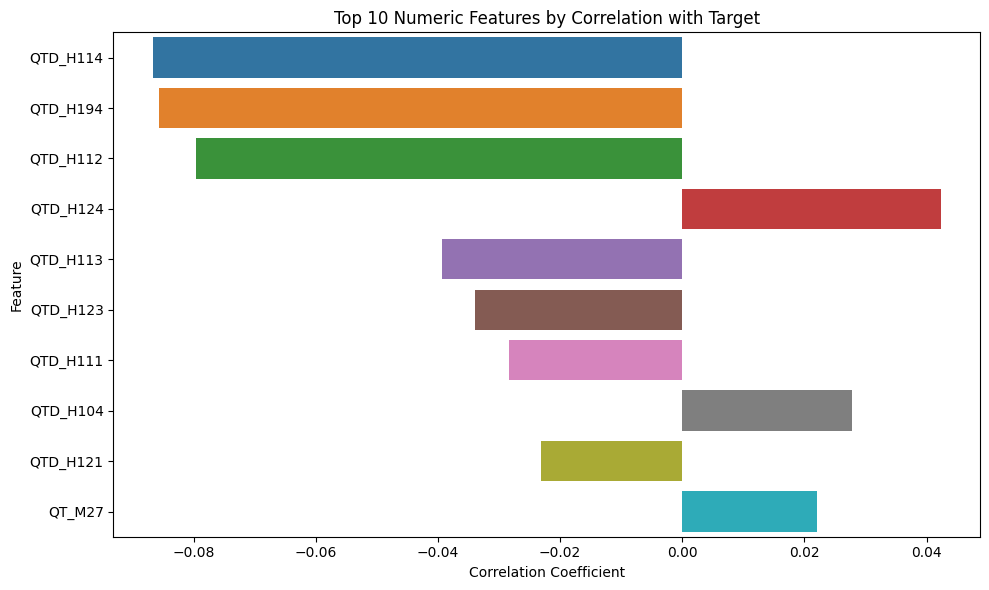

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warning about constant input
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in")

# Load data
data = pd.read_csv("data_collection_202203_202308.csv", low_memory=False)

# Assuming 'TARGET' is your binary target column (0/1)
target_col = 'TARGET'

# Calculate point-biserial correlation for numeric features
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != target_col]

# Store correlations
feature_correlations = []
for col in numeric_cols:
    if data[col].isnull().sum() < len(data):  # Skip if all missing
        # Check if the column has variation
        if data[col].nunique() > 1:
            try:
                # Handle potential constant segments by using dropna
                valid_data = data[[target_col, col]].dropna()
                if len(valid_data) > 0 and valid_data[col].nunique() > 1:
                    correlation, pvalue = stats.pointbiserialr(valid_data[target_col], valid_data[col])
                    feature_correlations.append((col, correlation, pvalue))
            except Exception as e:
                print(f"Error processing {col}: {e}")
        else:
            print(f"Skipping {col}: No variation in this column")

# Sort by absolute correlation
if feature_correlations:
    feature_correlations.sort(key=lambda x: abs(x[1]), reverse=True)

    # Display top predictive features
    print("Top numeric predictive features:")
    for feature, corr, pval in feature_correlations[:15]:
        print(f"{feature}: correlation = {corr:.4f}, p-value = {pval:.4f}")

    # Visualization
    top_features = [x[0] for x in feature_correlations[:10]]
    corr_values = [x[1] for x in feature_correlations[:10]]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_values, y=top_features)
    plt.title('Top 10 Numeric Features by Correlation with Target')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("No valid correlations could be calculated.")